/tmp/ipykernel_35345/2269466920.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  greenways_buffer = greenways.buffer(buffer_distance_degrees)


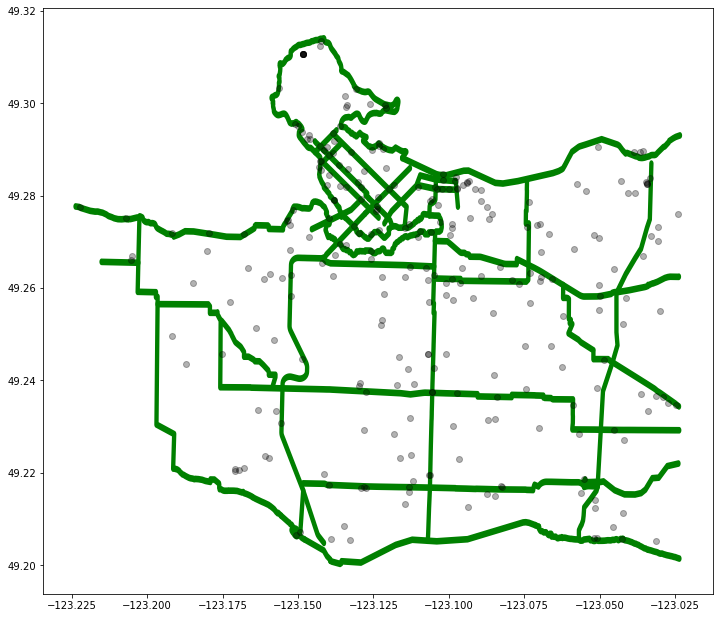

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

path_to_df_shape_file = 'data/1.Drinking-fountains/drinking-fountains.shp'
path_to_df_greenways_file = 'data/2.greenways/greenways.shp'

greenways = gpd.read_file(path_to_df_greenways_file)
drinking_fountains = gpd.read_file(path_to_df_shape_file)

buffer_distance_meters = 80

# Convert the buffer distance from meters to degrees
buffer_distance_degrees = buffer_distance_meters / (111319.9 * 1)  # Approximate conversion factor for WGS 84
greenways_buffer = greenways.buffer(buffer_distance_degrees)
fig, ax = plt.subplots(figsize=(12,12))
greenways_buffer.plot(ax=ax, color='green')
drinking_fountains.plot(ax=ax, color='black', alpha=0.3)
plt.show()

In [4]:
import geopandas as gpd
import pyproj


crs_proj4 = pyproj.CRS(greenways.crs).to_proj4()
units_start_index = crs_proj4.find("+units=") + len("+units=")
units_end_index = crs_proj4.find(" ", units_start_index)
units = crs_proj4[units_start_index:units_end_index]

print("Units:", units)


Units: longlat


/home/danial/.local/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


In [11]:
crs_name = greenways.crs.name

print("CRS Name:", crs_name)

CRS Name: WGS 84


here alan injam ke mikham tozih bedam ke 

when the unit is in CRS Name: WGS 84 means it is in degress?/

ChatGPT
Yes, when the CRS name is "WGS 84," it typically indicates that the coordinates in the shapefile are based on the World Geodetic System 1984 (WGS 84) reference ellipsoid. In this CRS, the units are indeed in degrees for both latitude and longitude.

WGS 84 is a widely used geographic coordinate system and is often used as the default CRS for global or worldwide datasets. It provides a consistent and standardized way to represent locations on the Earth's surface using latitude and longitude measurements.

Therefore, if your shapefile has a CRS name of "WGS 84," you can assume that the units are in degrees for both the X (longitude) and Y (latitude) coordinates.


baad in jupyter o kamel konam o push konam va tozihe in project o visualizations o kamel konam

baad video 27 e course o tamoom mikonam o baad done!

baad miram soraghe project haye cool e dg GIS 



/tmp/ipykernel_35229/1900597125.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  greenways_buffer = greenways.buffer(buffer_distance_degrees)


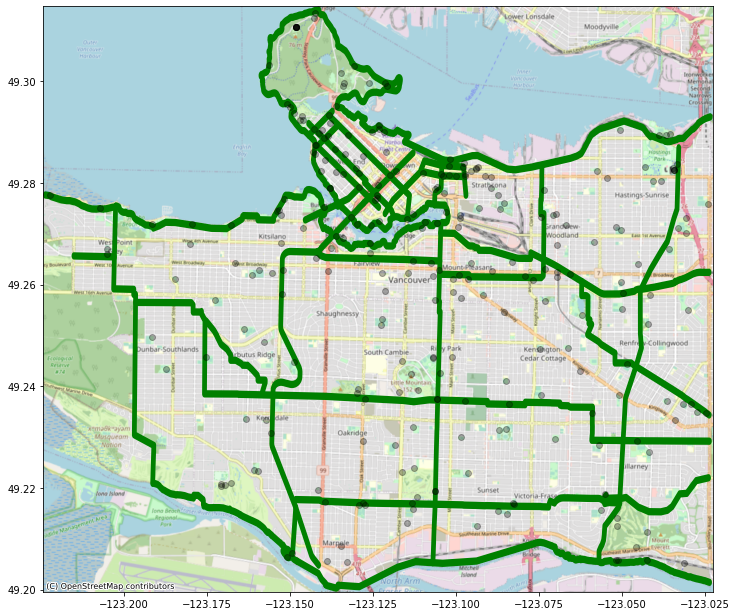

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

path_to_df_shape_file = 'data/1.Drinking-fountains/drinking-fountains.shp'
path_to_df_greenways_file = 'data/2.greenways/greenways.shp'

greenways = gpd.read_file(path_to_df_greenways_file)
drinking_fountains = gpd.read_file(path_to_df_shape_file)
buffer_distance_meters = 80

# Convert the buffer distance from meters to degrees
buffer_distance_degrees = buffer_distance_meters / (111319.9 * 1)  # Approximate conversion factor for WGS 84
greenways_buffer = greenways.buffer(buffer_distance_degrees)

# Calculate the overall plot extent
plot_extent = greenways_buffer.total_bounds

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))  # Increase the figure size to 12x12

# Set the plot extent
ax.set_xlim(plot_extent[0], plot_extent[2])
ax.set_ylim(plot_extent[1], plot_extent[3])

# Plot the OSM underlay with the OpenStreetMap tile provider
ctx.add_basemap(ax, crs=greenways_buffer.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Plot the buffered greenways and drinking fountains
greenways_buffer.plot(ax=ax, color='green')
drinking_fountains.plot(ax=ax, color='black', alpha=0.3)

plt.show()
